# Goal: predict the evaluation of the car using KNN

In [106]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
df = pd.read_csv('car.data')
df.head()

,buying,maint,dcor,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Preprocessing
-  get these categorical features inro numerical values

In [39]:
le = preprocessing.LabelEncoder()



for series_name, series in df.items():
    df[series_name] = le.fit_transform(series)
    
df.head()

,buying,maint,dcor,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


## Create training and testing data

In [86]:
Y = df['class']
X = df.drop('class', axis=1)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.1, shuffle=True)

In [87]:
model = KNeighborsClassifier(n_neighbors=7) ##most accurate neighbor count
model.fit(x_train, y_train)
predictions = model.predict(x_test)
acc = model.score(x_test, y_test)
acc


0.953757225433526

## Confusion matrix to visualize results

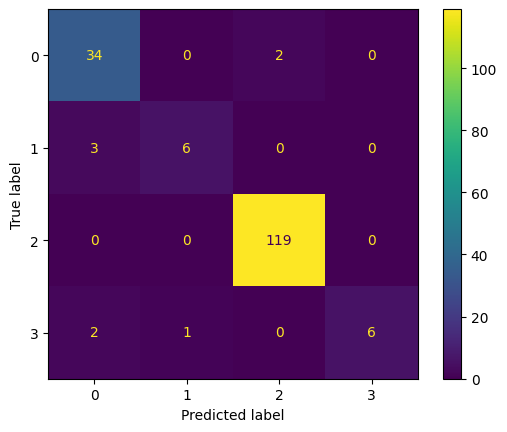

In [88]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, predictions, labels=model.classes_)
confusion_matrix
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=model.classes_)
cm_display.plot()
plt.show()


This is the highest level of accuracy we will get using KNN (we will sacrifice some accuracy later), but it is difficult to visualize the inner workings of the algorithm at a multiminesional level. Let's try to use dimensionality reduction to get a better look at the performance.

## PCA Dimensionality Reduction

KNN accuracy with PCA: 0.6473988439306358


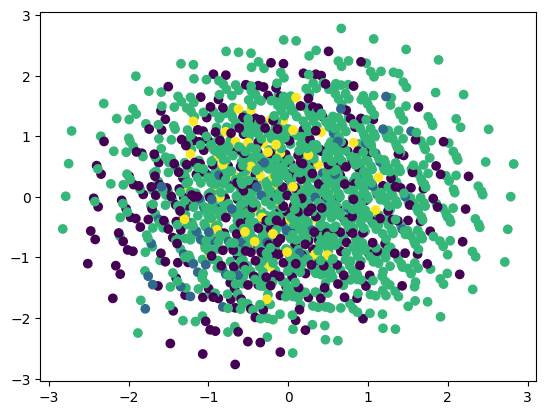

In [113]:
# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(), PCA(n_components=2))
pca.fit(x_train, y_train) #fit to the pca pipeline
x_train_transformed = pca.transform(x_train) # transform the data using the pca pipeline
# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_transformed, y_train)
acc = knn.score(pca.transform(x_test), y_test)
plt.scatter(x_train_transformed[:, 0], x_train_transformed[:, 1], c=y_train)
print(f"KNN accuracy with PCA: {acc}")

The reason why this PCA is failing is that we are dealing with ordinal data rather than more continuous/quanitative data, which PCA is not suited for. We need to find a better way for dimension reduction for this case.

## A better approach, Linear Discriminant Analysis

0.7109826589595376

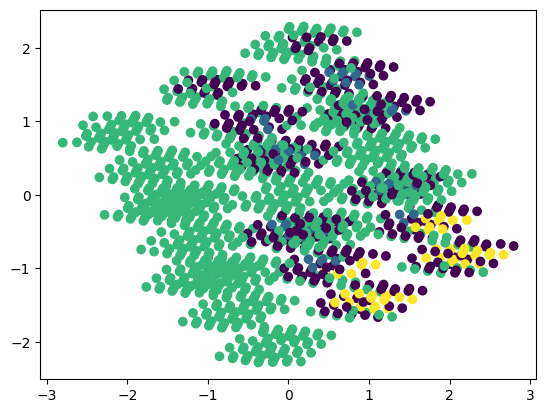

In [111]:
# Reduce dimension to 2 with LDA
lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))
lda.fit(x_train, y_train) #fit to the lda pipeline
x_train_transformed = lda.transform(x_train) # transform the data using the lda pipeline
# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_transformed, y_train)
acc = knn.score(lda.transform(x_test), y_test)
plt.scatter(x_train_transformed[:, 0], x_train_transformed[:, 1], c=y_train)
print(f"KNN accuracy with LDA: {acc}")

As one can see, the data is much more separated by class using LDA. LDA is better suited for classification problems and supervised learning like KNN, making it a better choice than PCA in the case of KNN with a qualitiative ordinal data set.